In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr,chisquare,spearmanr
import scipy
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Case_study_CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info() 
# -> du lieu khong bi khuyet thieu (205/205)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

C:\Users\playt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

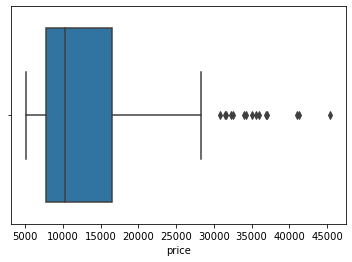

In [5]:
sb.boxplot(df['price'])
#kiểm tra giá trị ngoại lai cho biến price đang cần phân tích
#ta thấy các giá trị tập trung ở phần bên trái trong khoảng 5000 đến gần 20000

In [6]:
#loại bỏ các giá trị không cần thiết như trên biểu đồ hộp phía trên
df = df[df.price < 25000]
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


C:\Users\playt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

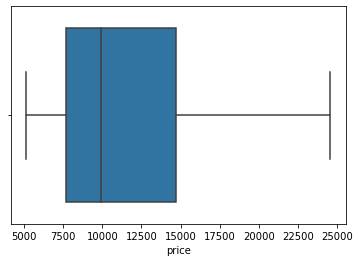

In [7]:
sb.boxplot(df['price'])
#đã xử lý xong dữ liệu ngoại lai gây ảnh hưởng mạnh đến quá trình dự báo

In [8]:
#reset index sau khi loại bỏ ngoại lai, dự phòng cho trường hợp sử dụng iloc để thao tác
df.reset_index(inplace=True)

# Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu

In [9]:
#tạo cột automaker với 1 kí tự bất kì
df['Automaker'] = 0
# hãng xe là kí tự đầu tiên được ngăn cách bởi dấu cách của tên xe
for i in range(len(df['CarName'])):
    df['Automaker'].iloc[i] = df['CarName'].iloc[i].split()[0].lower()
df

C:\Users\playt\AppData\Local\Temp\ipykernel_3576\3892966539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Automaker'] = 0
C:\Users\playt\AppData\Local\Temp\ipykernel_3576\3892966539.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Automaker'].iloc[i] = df['CarName'].iloc[i].split()[0].lower()


,index,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Automaker
0,0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
183,201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
184,202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
185,203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [10]:
#kiểm tra tên hãng để phát hiện sai dữ liệu
df.Automaker.unique()
#-> hang xe bi sai : toyota, volkswagen,mazda

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'vw', 'volvo'],
      dtype=object)

In [213]:
#sữa lỗi sai dữ liệu bằng các tên đúng có nhiều kí tự trùng nhất(thủ công)
for i in range(len(df.Automaker)):
    if df.Automaker.iloc[i] == 'maxda' : df.Automaker.iloc[i] = 'mazda'
    elif df.Automaker.iloc[i] == 'vokswagen' or df.Automaker.iloc[i] == 'vw': df.Automaker.iloc[i] = 'volkswagen'
    elif df.Automaker.iloc[i] == 'toyouta' : df.Automaker.iloc[i] = 'toyota'
#kiểm tra lại sau khi thao tác => clean
df.Automaker.unique()

C:\Users\playt\AppData\Local\Temp\ipykernel_7504\3287505791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if df.Automaker.iloc[i] == 'maxda' : df.Automaker.iloc[i] = 'mazda'
C:\Users\playt\AppData\Local\Temp\ipykernel_7504\3287505791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif df.Automaker.iloc[i] == 'toyouta' : df.Automaker.iloc[i] = 'toyota'
C:\Users\playt\AppData\Local\Temp\ipykernel_7504\3287505791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'], dtype=object)

# Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu


In [214]:
#chuyển dữ liệu về đúng kiểu dữ liệu và thực hiện mã hóa thủ công do có ít đối tượng, không cần thiết sử dụng ecoding
df.cylindernumber.unique() #Số lượng xi lanh đặt trong xe

array(['four', 'six', 'five', 'three', 'two'], dtype=object)

In [215]:
num_dict = {'two':2,'three':3,'four':4,'five':5,'six':6}
for i in range(len(df.cylindernumber)):
    for keys in num_dict.keys():
        if df.cylindernumber.iloc[i] == keys:
            df.cylindernumber.iloc[i] = num_dict[keys] #so sánh từng dòng dữ liệu với dict ở trên, nếu True 
df.cylindernumber.astype('int64')                       #=> thay thành values của key đó

C:\Users\playt\AppData\Local\Temp\ipykernel_7504\477790937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cylindernumber.iloc[i] = num_dict[keys] #so sánh từng dòng dữ liệu với dict ở trên, nếu True


0      4
1      4
2      6
3      4
4      5
      ..
182    4
183    4
184    6
185    6
186    4
Name: cylindernumber, Length: 187, dtype: int64

# Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định


 0    59
 1    52
 2    32
 3    23
-1    18
-2     3
Name: symboling, dtype: int64

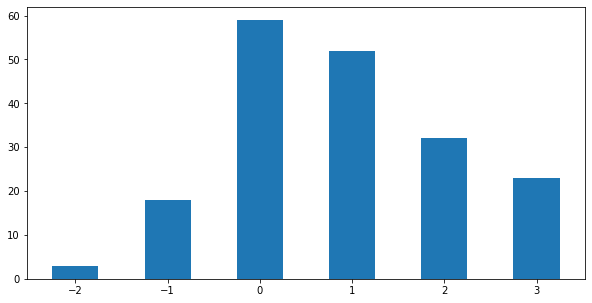

In [226]:
#do symboling là thuộc tính định tính -> dùng spearman để kiểm định tương quan
symboling=df['symboling'].value_counts()
fig = plt.figure(figsize = (10, 5))
plt.bar(symboling.index,symboling.values,width=0.5)
symboling
#mức độ an toàn ở 0 và 1 có dữ liệu trải dài nhất, mức độ an toàn tuyệt đối là ít loại nhất

Text(0.5, 1.0, 'Gia xe trung binh cua moi hang xe')

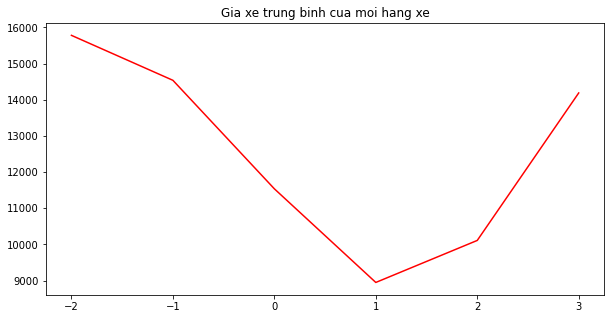

In [11]:
dt0=df.groupby('symboling')['price'].mean()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(dt0.index,dt0.values, color = 'red')
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('Gia xe trung binh cua moi hang xe',
             loc='center', )
#theo biểu đồ, ta thấy giá trung bình của các loại xe có
#độ an toàn tuyệt đối dù ít loại nhất nhưng giá thành trung bình lại cao nhất 
#các hãng sản xuất hướng tới các loại xe có giá thành trung bình thấp để dễ tiếp cận khách hàng nhưng không muốn rủi ro cao
#-> nhiều loại xe có mức độ an toàn là trung bình cao với giá phải chăng

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
audi            7
plymouth        7
saab            6
bmw             5
isuzu           4
chevrolet       3
alfa-romero     3
maxda           2
renault         2
vw              2
mercury         1
porsche         1
toyouta         1
vokswagen       1
Name: Automaker, dtype: int64

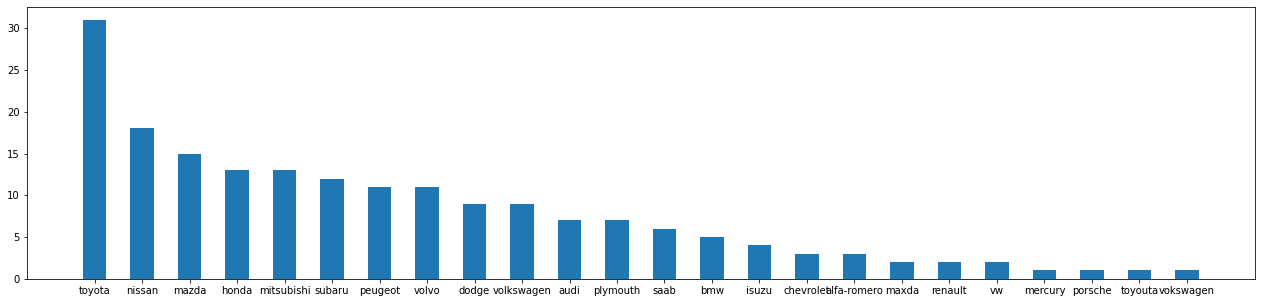

In [21]:
Automaker=df['Automaker'].value_counts() #hãng xe
fig = plt.figure(figsize = (22, 5))
plt.bar(Automaker.index,Automaker.values,width=0.5)
Automaker
#hãng xe nhiều nhất trong bộ dữ liệu đã được lọc thuộc toyota

Text(0.5, 1.0, 'Gia xe trung binh cua moi hang xe')

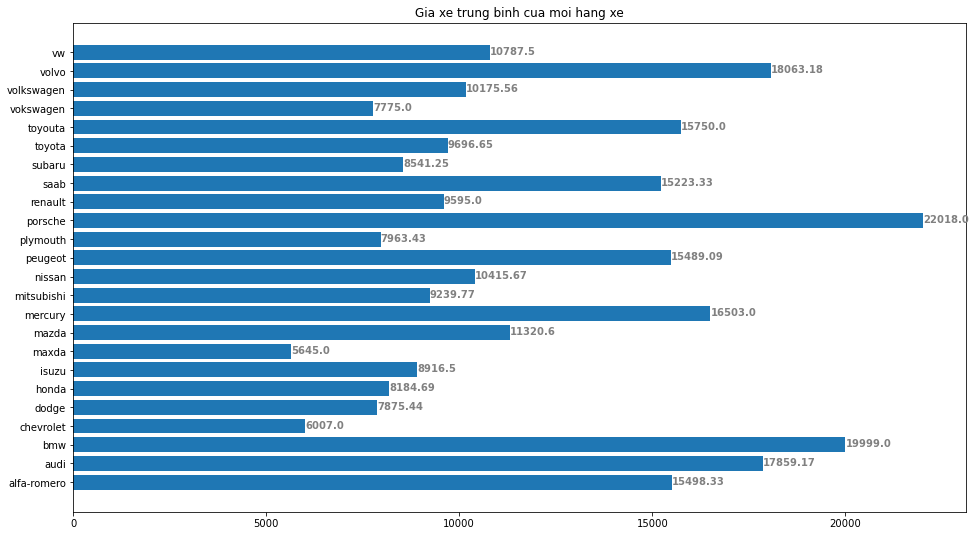

In [13]:
dt1=df.groupby('Automaker')['price'].mean()
fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(dt1.index,dt1.values)
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('Gia xe trung binh cua moi hang xe',
             loc='center', )
#ta thấy giá xe trung bình của hãng porsche là cao nhất và thấp nhất là chevrolet

11255.669342245988

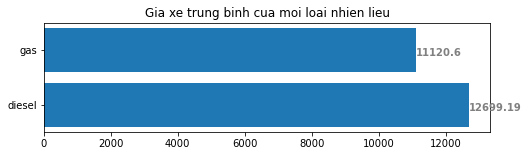

In [14]:
#giá xe trung bình của mỗi loại nhiên liệu
dt2=df.groupby('fueltype')['price'].mean() #loại nhiên liệu
fig, ax = plt.subplots(figsize=(8, 2))
ax.barh(dt2.index,dt2.values)
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('Gia xe trung binh cua moi loai nhien lieu',
             loc='center', )
df.price.mean()
#ta thấy giá xe trung bình và giá xe trung bình theo mỗi loại nhiên nhiệu lệch nhau không nhiều, 
#so với thuộc tính hãng xe ở trên thì giá trị trung bình của giá xe có thể lên tới hơn 20.000
#-> ta loại thuộc tính này ra khỏi data 

In [90]:
#xóa cột flueltype do 2 loại nhiên liệu không gây biến đổi đáng kể đến giá xe
del df['fueltype']
df

,index,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Automaker
0,0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,200,201,-1,volvo 145e (sw),std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
183,201,202,-1,volvo 144ea,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
184,202,203,-1,volvo 244dl,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
185,203,204,-1,volvo 246,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


std      154
turbo     33
Name: aspiration, dtype: int64

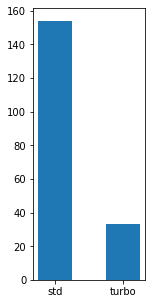

In [91]:
aspiration=df['aspiration'].value_counts() #loại hút
fig = plt.figure(figsize = (2, 5))
plt.bar(aspiration.index,aspiration.values,width=0.5)
aspiration

11255.669342245988

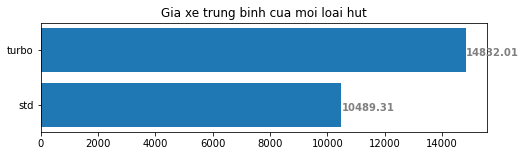

In [92]:
dt3=df.groupby('aspiration')['price'].mean()
fig, ax = plt.subplots(figsize=(8, 2))
ax.barh(dt3.index,dt3.values)
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('Gia xe trung binh cua moi loai hut',
             loc='center', )
df.price.mean()

four    106
two      81
Name: doornumber, dtype: int64

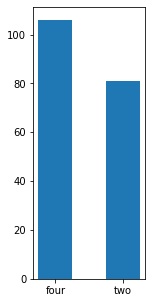

In [93]:
doornumber=df['doornumber'].value_counts() #lượng 
fig = plt.figure(figsize = (2, 5))
plt.bar(doornumber.index,doornumber.values,width=0.5)
doornumber

11255.669342245988

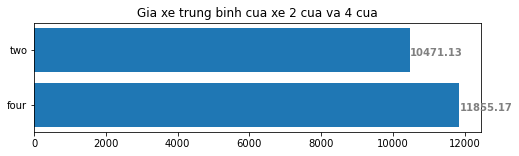

In [94]:
dt4=df.groupby('doornumber')['price'].mean()
fig, ax = plt.subplots(figsize=(8, 2))
ax.barh(dt4.index,dt4.values)
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('Gia xe trung binh cua xe 2 cua va 4 cua',
             loc='center', )
df.price.mean()
#ta thấy giá xe trung bình và giá xe trung bình theo số cửa lệch nhau không nhiều, 
#so với thuộc tính hãng xe ở trên thì giá trị trung bình của giá xe có thể lên tới hơn 20.000
#-> ta loại thuộc tính này ra khỏi data

In [95]:
#xóa cột doornumber do 2 loại nhiên liệu không gây biến đổi đáng kể đến giá xe
del df['doornumber']
df

,index,car_ID,symboling,CarName,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Automaker
0,0,1,3,alfa-romero giulia,std,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,1,2,3,alfa-romero stelvio,std,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,2,3,1,alfa-romero Quadrifoglio,std,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,3,4,2,audi 100 ls,std,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,4,5,2,audi 100ls,std,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,200,201,-1,volvo 145e (sw),std,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
183,201,202,-1,volvo 144ea,turbo,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
184,202,203,-1,volvo 244dl,std,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
185,203,204,-1,volvo 246,turbo,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


sedan          86
hatchback      69
wagon          24
convertible     4
hardtop         4
Name: carbody, dtype: int64

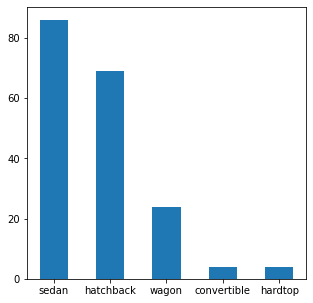

In [96]:
carbody=df['carbody'].value_counts()
fig = plt.figure(figsize = (5, 5))
plt.bar(carbody.index,carbody.values,width=0.5)
carbody

11255.669342245988

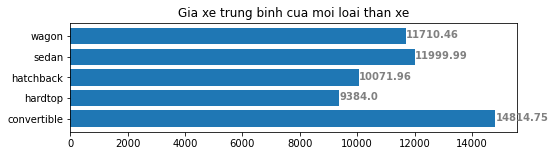

In [97]:
dt5=df.groupby('carbody')['price'].mean()
fig, ax = plt.subplots(figsize=(8, 2))
ax.barh(dt5.index,dt5.values)
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('Gia xe trung binh cua moi loai than xe',
             loc='center', )
df.price.mean()

fwd    120
rwd     58
4wd      9
Name: drivewheel, dtype: int64

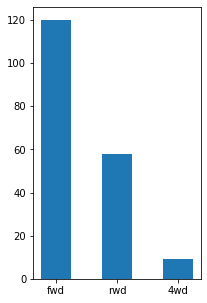

In [98]:
drivewheel=df['drivewheel'].value_counts()
fig = plt.figure(figsize = (3, 5))
plt.bar(drivewheel.index,drivewheel.values,width=0.5)
drivewheel

11255.669342245988

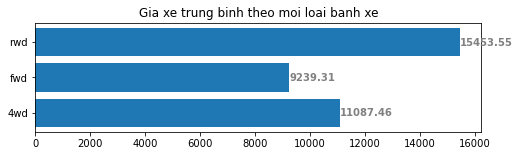

In [99]:
dt6=df.groupby('drivewheel')['price'].mean()
fig, ax = plt.subplots(figsize=(8, 2))
ax.barh(dt6.index,dt6.values)
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('Gia xe trung binh theo moi loai banh xe',
             loc='center', )
df.price.mean()

In [100]:
enginelocation=df['enginelocation'].value_counts() #Vị trí động cơ
# fig = plt.figure(figsize = (3, 5))
# plt.bar(enginelocation.index,enginelocation.values,width=0.2)
enginelocation
#engine chỉ có 1 loại -> không ảnh hưởng tới giá
#-> loại bỏ thuộc tính này

front    187
Name: enginelocation, dtype: int64

In [101]:
del df['enginelocation']
df

,index,car_ID,symboling,CarName,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Automaker
0,0,1,3,alfa-romero giulia,std,convertible,rwd,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,1,2,3,alfa-romero stelvio,std,convertible,rwd,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,2,3,1,alfa-romero Quadrifoglio,std,hatchback,rwd,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,3,4,2,audi 100 ls,std,sedan,fwd,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,4,5,2,audi 100ls,std,sedan,4wd,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,200,201,-1,volvo 145e (sw),std,sedan,rwd,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
183,201,202,-1,volvo 144ea,turbo,sedan,rwd,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
184,202,203,-1,volvo 244dl,std,sedan,rwd,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
185,203,204,-1,volvo 246,turbo,sedan,rwd,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


ohc      141
l         12
ohcf      12
dohc      10
ohcv       8
rotor      4
Name: enginetype, dtype: int64

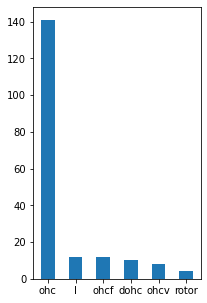

In [102]:
enginetype=df['enginetype'].value_counts() #Loại động cơ
fig = plt.figure(figsize = (3, 5))
plt.bar(enginetype.index,enginetype.values,width=0.5)
enginetype

11255.669342245988

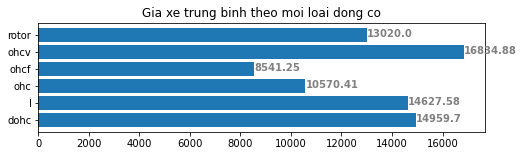

In [103]:
dt7=df.groupby('enginetype')['price'].mean()
fig, ax = plt.subplots(figsize=(8, 2))
ax.barh(dt7.index,dt7.values)
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('Gia xe trung binh theo moi loai dong co',
             loc='center', )
df.price.mean()

4    159
6     16
5      7
2      4
3      1
Name: cylindernumber, dtype: int64

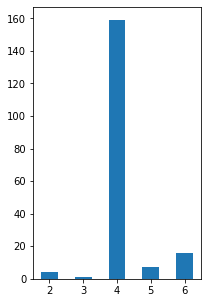

In [104]:
cylindernumber=df['cylindernumber'].value_counts() #Số lượng xi lanh đặt trong xe
fig = plt.figure(figsize = (3, 5))
plt.bar(cylindernumber.index,cylindernumber.values,width=0.5)
cylindernumber

11255.669342245988

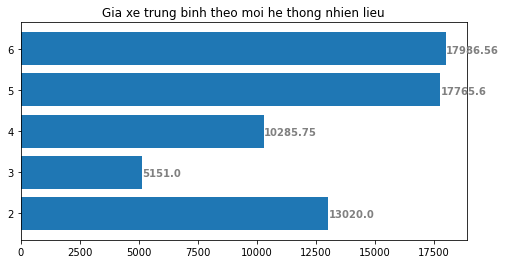

In [105]:
dt8=df.groupby('cylindernumber')['price'].mean()
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(dt8.index,dt8.values)
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('Gia xe trung binh theo moi he thong nhien lieu',
             loc='center', )
df.price.mean()

mpfi    80
2bbl    66
idi     16
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

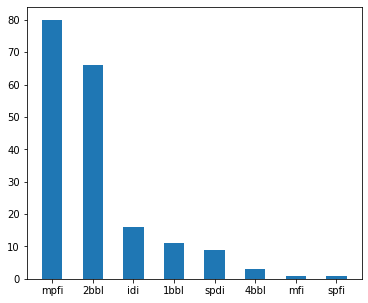

In [106]:
fuelsystem =df['fuelsystem'].value_counts() #Hệ thống nhiên liệu của xe ô tô
fig = plt.figure(figsize = (6, 5))
plt.bar(fuelsystem.index,fuelsystem.values,width=0.5)
fuelsystem

11255.669342245988

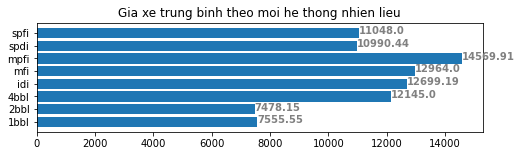

In [107]:
dt9=df.groupby('fuelsystem')['price'].mean() 
fig, ax = plt.subplots(figsize=(8, 2))
ax.barh(dt9.index,dt9.values)
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('Gia xe trung binh theo moi he thong nhien lieu',
             loc='center', )
df.price.mean()

# Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng (xem xét có những biến nào có tương quan lớn với nhau, chỉ giữa lại 1 trong các biến đó đưa vào mô hình)


In [15]:
#biến định lượng
df_dinhluong = df[['wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
df_dinhluong

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114,5400,23,28,16845.0
183,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160,5300,19,25,19045.0
184,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134,5500,18,23,21485.0
185,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106,4800,26,27,22470.0


<AxesSubplot:>

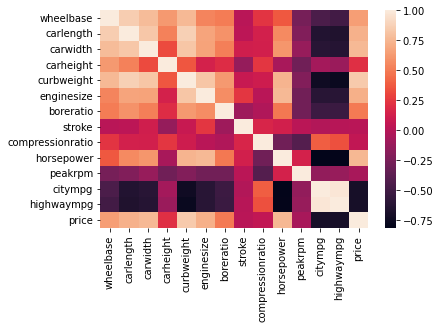

In [16]:
df_dinhluong.corr()
sb.heatmap(df_dinhluong.corr())
#tự đánh giá theo mức độ yêu cầu

In [17]:
corr_dinhluong = df_dinhluong.corr()
corr_dinhluong

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.854274,0.778540,0.622386,0.763603,0.535070,0.499378,0.015000,0.234521,0.364305,-0.266166,-0.451772,-0.499308,0.639787
carlength,0.854274,1.000000,0.830048,0.521015,0.869837,0.672558,0.590085,0.029997,0.135111,0.557266,-0.222168,-0.643807,-0.656751,0.728183
carwidth,0.778540,0.830048,1.000000,0.314365,0.820864,0.665384,0.517282,0.121982,0.129089,0.603646,-0.130338,-0.614672,-0.629024,0.764809
carheight,0.622386,0.521015,0.314365,1.000000,0.361107,0.140596,0.196693,-0.134021,0.239374,-0.057790,-0.288667,-0.069471,-0.116196,0.213242
curbweight,0.763603,0.869837,0.820864,0.361107,1.000000,0.821149,0.622155,0.077270,0.107326,0.742588,-0.213837,-0.739080,-0.765294,0.837452
enginesize,0.535070,0.672558,0.665384,0.140596,0.821149,1.000000,0.570607,0.237289,0.015147,0.765133,-0.287192,-0.616722,-0.620567,0.719674
boreratio,0.499378,0.590085,0.517282,0.196693,0.622155,0.570607,1.000000,-0.101862,-0.026399,0.489839,-0.288161,-0.522013,-0.535235,0.491275
stroke,0.015000,0.029997,0.121982,-0.134021,0.077270,0.237289,-0.101862,1.000000,0.159660,0.125579,0.021922,-0.015251,0.005414,0.015232
compressionratio,0.234521,0.135111,0.129089,0.239374,0.107326,0.015147,-0.026399,0.159660,1.000000,-0.294051,-0.412883,0.387941,0.341032,0.047261
horsepower,0.364305,0.557266,0.603646,-0.057790,0.742588,0.765133,0.489839,0.125579,-0.294051,1.000000,0.142175,-0.812213,-0.799972,0.752297


In [18]:
#hệ số tương quan của các thuộc tính với price
corr_dinhluong.price

wheelbase           0.639787
carlength           0.728183
carwidth            0.764809
carheight           0.213242
curbweight          0.837452
enginesize          0.719674
boreratio           0.491275
stroke              0.015232
compressionratio    0.047261
horsepower          0.752297
peakrpm            -0.058030
citympg            -0.699847
highwaympg         -0.699838
price               1.000000
Name: price, dtype: float64

In [238]:
high_CorrelationCoefficient1 = []
for i in corr_dinhluong.index:
    if i!='price':
        if np.abs(corr_dinhluong['price'][i]) >= 0.7:
            high_CorrelationCoefficient1.append(i)
high_CorrelationCoefficient1 = set(high_CorrelationCoefficient1)
high_CorrelationCoefficient1=list(high_CorrelationCoefficient1)
high_CorrelationCoefficient1
#-> chỉ chọn các biến có tương quan tuyến tính và tuyến tính cao với thuộc tính price
# chọn các thuộc tính có hệ số tương quan cao(0.8) chỉ trả về 1 thuộc tính,
#giảm yêu cầu về mức độ tương quan để có thêm nhiều biến cho mô hình

#ta chọn được 5 biến định tính cho mô hình

['horsepower', 'enginesize', 'carlength', 'curbweight', 'carwidth']

# Tiến hành mã hóa tạo ra các biến dumy từ các biến category (thang đo nominal) ban đầu


In [113]:
#các biến định tính sau khi được chọn bằng pp feature selection bao gồm
#symboling,Automaker,aspiration,carbody,drivewheel,cylindernumber
#các biến cần mã hóa sẽ được thêm vào 1 cột nữa trong dataframe
high_CorrelationCoefficient2 = ['symboling','enc_Automaker','enc_aspiration','enc_carbody','enc_drivewheel','cylindernumber']

In [114]:
#symboling và cylingnumber đã ở dạng định danh kiểu số nên không cần mã hóa
encoder = LabelEncoder()
df['enc_Automaker'] = encoder.fit_transform(df['Automaker'])
df['enc_aspiration'] = encoder.fit_transform(df['aspiration'])
df['enc_carbody'] = encoder.fit_transform(df['carbody'])
df['enc_drivewheel'] = encoder.fit_transform(df['drivewheel'])
df

C:\Users\playt\AppData\Local\Temp\ipykernel_7504\196594117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enc_Automaker'] = encoder.fit_transform(df['Automaker'])
C:\Users\playt\AppData\Local\Temp\ipykernel_7504\196594117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enc_aspiration'] = encoder.fit_transform(df['aspiration'])
C:\Users\playt\AppData\Local\Temp\ipykernel_7504\196594117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,index,car_ID,symboling,CarName,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,...,horsepower,peakrpm,citympg,highwaympg,price,Automaker,enc_Automaker,enc_aspiration,enc_carbody,enc_drivewheel
0,0,1,3,alfa-romero giulia,std,convertible,rwd,88.6,168.8,64.1,...,111,5000,21,27,13495.0,alfa-romero,0,0,0,2
1,1,2,3,alfa-romero stelvio,std,convertible,rwd,88.6,168.8,64.1,...,111,5000,21,27,16500.0,alfa-romero,0,0,0,2
2,2,3,1,alfa-romero Quadrifoglio,std,hatchback,rwd,94.5,171.2,65.5,...,154,5000,19,26,16500.0,alfa-romero,0,0,2,2
3,3,4,2,audi 100 ls,std,sedan,fwd,99.8,176.6,66.2,...,102,5500,24,30,13950.0,audi,1,0,3,1
4,4,5,2,audi 100ls,std,sedan,4wd,99.4,176.6,66.4,...,115,5500,18,22,17450.0,audi,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,200,201,-1,volvo 145e (sw),std,sedan,rwd,109.1,188.8,68.9,...,114,5400,23,28,16845.0,volvo,19,0,3,2
183,201,202,-1,volvo 144ea,turbo,sedan,rwd,109.1,188.8,68.8,...,160,5300,19,25,19045.0,volvo,19,1,3,2
184,202,203,-1,volvo 244dl,std,sedan,rwd,109.1,188.8,68.9,...,134,5500,18,23,21485.0,volvo,19,0,3,2
185,203,204,-1,volvo 246,turbo,sedan,rwd,109.1,188.8,68.9,...,106,4800,26,27,22470.0,volvo,19,1,3,2


# Xây dựng mô hình hồi quy tuyến tính trên các biến được chọn bởi phương pháp feature selection.

In [115]:
#kiểm tra các cột mã hóa đã được tạo đủ chưa
df

,index,car_ID,symboling,CarName,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,...,horsepower,peakrpm,citympg,highwaympg,price,Automaker,enc_Automaker,enc_aspiration,enc_carbody,enc_drivewheel
0,0,1,3,alfa-romero giulia,std,convertible,rwd,88.6,168.8,64.1,...,111,5000,21,27,13495.0,alfa-romero,0,0,0,2
1,1,2,3,alfa-romero stelvio,std,convertible,rwd,88.6,168.8,64.1,...,111,5000,21,27,16500.0,alfa-romero,0,0,0,2
2,2,3,1,alfa-romero Quadrifoglio,std,hatchback,rwd,94.5,171.2,65.5,...,154,5000,19,26,16500.0,alfa-romero,0,0,2,2
3,3,4,2,audi 100 ls,std,sedan,fwd,99.8,176.6,66.2,...,102,5500,24,30,13950.0,audi,1,0,3,1
4,4,5,2,audi 100ls,std,sedan,4wd,99.4,176.6,66.4,...,115,5500,18,22,17450.0,audi,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,200,201,-1,volvo 145e (sw),std,sedan,rwd,109.1,188.8,68.9,...,114,5400,23,28,16845.0,volvo,19,0,3,2
183,201,202,-1,volvo 144ea,turbo,sedan,rwd,109.1,188.8,68.8,...,160,5300,19,25,19045.0,volvo,19,1,3,2
184,202,203,-1,volvo 244dl,std,sedan,rwd,109.1,188.8,68.9,...,134,5500,18,23,21485.0,volvo,19,0,3,2
185,203,204,-1,volvo 246,turbo,sedan,rwd,109.1,188.8,68.9,...,106,4800,26,27,22470.0,volvo,19,1,3,2


In [116]:
var_FeatureSelection = high_CorrelationCoefficient1 + high_CorrelationCoefficient2
var_FeatureSelection.append('price')
var_FeatureSelection
#đây là những thuộc tính quan trọng sau khi đã
#lọc ra những biến có tương quan thấp và không gây ảnh hưởng tới giá(đã bao gồm price)

['horsepower',
 'enginesize',
 'carlength',
 'curbweight',
 'carwidth',
 'symboling',
 'enc_Automaker',
 'enc_aspiration',
 'enc_carbody',
 'enc_drivewheel',
 'cylindernumber',
 'price']

In [117]:
final_df = df[var_FeatureSelection]
final_df.reset_index()
final_df
#dataframe sau khi qua phương pháp chọn biến đưa vào mô hình (đã bao gồm price)
#ta có 11 cột thuộc tính có tính chất gây ảnh hưởng trực tiếp tới giá xe
#sau khi xem xét xữ liệu mới, nhận thấy dữ liệu lệch nhau khá lớn giữa các thuộc tính 
#gây ảnh hưởng đến mô hình và không tính toán được-> tiến hành chuẩn hóa dữ liệu các cột
#horsepower,enginesize,carlength,curweight,carwitdth và price

,horsepower,enginesize,carlength,curbweight,carwidth,symboling,enc_Automaker,enc_aspiration,enc_carbody,enc_drivewheel,cylindernumber,price
0,111,130,168.8,2548,64.1,3,0,0,0,2,4,13495.0
1,111,130,168.8,2548,64.1,3,0,0,0,2,4,16500.0
2,154,152,171.2,2823,65.5,1,0,0,2,2,6,16500.0
3,102,109,176.6,2337,66.2,2,1,0,3,1,4,13950.0
4,115,136,176.6,2824,66.4,2,1,0,3,0,5,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
182,114,141,188.8,2952,68.9,-1,19,0,3,2,4,16845.0
183,160,141,188.8,3049,68.8,-1,19,1,3,2,4,19045.0
184,134,173,188.8,3012,68.9,-1,19,0,3,2,6,21485.0
185,106,145,188.8,3217,68.9,-1,19,1,3,2,6,22470.0


# tiến hành chuẩn hóa dữ liệu mới

In [118]:
#sử dụng StandardScaler
final_df2 = final_df[['horsepower','enginesize','carlength','curbweight','carwidth','price']]
s_scaler = StandardScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler
final_df2_s = s_scaler.fit_transform(final_df2)
# lấy danh sáchc cột
col_names = list(final_df2.columns)
# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
final_df2_s = pd.DataFrame(final_df2_s, columns=col_names)
final_df2_s

,horsepower,enginesize,carlength,curbweight,carwidth,price
0,0.469464,0.490919,-0.333060,0.201619,-0.831401,0.490454
1,0.469464,0.490919,-0.333060,0.201619,-0.831401,1.148603
2,1.892903,1.346699,-0.119307,0.848422,-0.034401,1.148603
3,0.171535,-0.325962,0.361637,-0.294655,0.364099,0.590107
4,0.601877,0.724314,0.361637,0.850774,0.477956,1.356670
...,...,...,...,...,...,...
182,0.568774,0.918809,1.448215,1.151831,1.901170,1.224164
183,2.091523,0.918809,1.448215,1.379976,1.844242,1.706004
184,1.230838,2.163581,1.448215,1.292952,1.901170,2.240408
185,0.303948,1.074406,1.448215,1.775114,1.901170,2.456141


In [122]:
#các df mới được tạo ra, giữ lại các df cũ để tham chiếu đến giá trị gốc trước khi được scaling và ecoding
#final_df : df sau khi sử dụng phương pháp frature selection với tí thuộc tính hơn ban đầu
#final_df2: các thuộc tính category sau khi được tách ra để chuẩn hóa
#final_df2_s : các thuộc tính category sau khi được chuẩn hóa

#dùng hàm concat để nối theo cột với axis =1 
final_df3 = pd.concat([final_df2_s.iloc[:,:5],final_df.iloc[:,5:11],final_df2_s.iloc[:,5:]],axis=1)
final_df3
#final_df2_s.iloc[:,:5] lấy các cột thuộc tính chuẩn hóa trừ price
#final_df.iloc[:,5:11] lấy các cột thuộc tính định lượng trong df sau pp feature selection
#final_df2_s.iloc[:,5:] lấy cột price để sau cùng -> dễ slice cho các biến trong mô hình hồi quy

,horsepower,enginesize,carlength,curbweight,carwidth,symboling,enc_Automaker,enc_aspiration,enc_carbody,enc_drivewheel,cylindernumber,price
0,0.469464,0.490919,-0.333060,0.201619,-0.831401,3,0,0,0,2,4,0.490454
1,0.469464,0.490919,-0.333060,0.201619,-0.831401,3,0,0,0,2,4,1.148603
2,1.892903,1.346699,-0.119307,0.848422,-0.034401,1,0,0,2,2,6,1.148603
3,0.171535,-0.325962,0.361637,-0.294655,0.364099,2,1,0,3,1,4,0.590107
4,0.601877,0.724314,0.361637,0.850774,0.477956,2,1,0,3,0,5,1.356670
...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.568774,0.918809,1.448215,1.151831,1.901170,-1,19,0,3,2,4,1.224164
183,2.091523,0.918809,1.448215,1.379976,1.844242,-1,19,1,3,2,4,1.706004
184,1.230838,2.163581,1.448215,1.292952,1.901170,-1,19,0,3,2,6,2.240408
185,0.303948,1.074406,1.448215,1.775114,1.901170,-1,19,1,3,2,6,2.456141


# mô hình hồi quy tuyến tính

In [168]:
y = final_df3.price.values.reshape(-1,1)
X = final_df3.iloc[:,0:11].values.reshape(-1,11)
# chia bộ dữ liệu làm 2 tập train và test theo tỉ lệ 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# mô hình hồi quy 80% dữ liệu train

In [169]:
temp = high_CorrelationCoefficient1 + high_CorrelationCoefficient2 
#biến tạm thời để lưu list các thuộc tính không bao gồm price để viết mô hình hồi quy
temp

['horsepower',
 'enginesize',
 'carlength',
 'curbweight',
 'carwidth',
 'symboling',
 'enc_Automaker',
 'enc_aspiration',
 'enc_carbody',
 'enc_drivewheel',
 'cylindernumber']

In [170]:
regressor80 = LinearRegression()
regressor80.fit(X_train, y_train)

LinearRegression()

In [171]:
regressor80.intercept_,regressor.coef_ #các hằng số đại diện cho độ dốc hồi quy

(array([-1.46075173]),
 array([[ 0.27424233, -0.1524029 ,  0.04850613,  0.48475849,  0.27964745,
          0.14362431, -0.01077375, -0.1670021 , -0.10685294, -0.03467953,
          0.29446383]]))

In [172]:
#code show mô hình với dữ liệu train
print(f'mô hình hồi quy với 80% dữ liệu có dạng: \n y = {regressor80.intercept_[0]}+ {regressor80.coef_[0][0]} * {temp[0]}\n\t\t\t+ {regressor80.coef_[0][1]} * {temp[1]}\n\t\t\t+ {regressor80.coef_[0][2]} * {temp[2]}\n\t\t\t+ {regressor80.coef_[0][3]} * {temp[3]}\n\t\t\t+ {regressor80.coef_[0][4]} * {temp[4]}\n\t\t\t+ {regressor80.coef_[0][5]} * {temp[5]}\n\t\t\t+ {regressor80.coef_[0][6]} * {temp[6]}\n\t\t\t+ {regressor80.coef_[0][7]} * {temp[7]}\n\t\t\t+ {regressor80.coef_[0][8]} * {temp[8]}\n\t\t\t+ {regressor80.coef_[0][9]} * {temp[9]}\n\t\t\t+ {regressor80.coef_[0][10]} * {temp[10]}')

mô hình hồi quy với 80% dữ liệu có dạng: 
 y = -1.4607517295755366+ 0.22078266487406423 * horsepower
			+ -0.22727026173744047 * enginesize
			+ 0.1473758138266027 * carlength
			+ 0.31057402283610747 * curbweight
			+ 0.24055944641055582 * carwidth
			+ -0.028449942471867454 * symboling
			+ -0.02936969822458259 * enc_Automaker
			+ 0.24929298219980045 * enc_aspiration
			+ -0.023507420443727594 * enc_carbody
			+ 0.4699023764407587 * enc_drivewheel
			+ 0.29671331723996475 * cylindernumber


In [173]:
regressor20 = LinearRegression()
regressor20.fit(X_test, y_test)

LinearRegression()

In [147]:
regressor20.intercept_,regressor.coef_ #các hằng số đại diện cho độ dốc hồi quy

(array([-0.98227497]),
 array([[ 0.27424233, -0.1524029 ,  0.04850613,  0.48475849,  0.27964745,
          0.14362431, -0.01077375, -0.1670021 , -0.10685294, -0.03467953,
          0.29446383]]))

In [174]:
print(f'mô hình hồi quy với 20% dữ liệu test có dạng: \n y = {regressor20.intercept_[0]}+ {regressor20.coef_[0][0]} * {temp[0]}\n\t\t\t+ {regressor20.coef_[0][1]} * {temp[1]}\n\t\t\t+ {regressor20.coef_[0][2]} * {temp[2]}\n\t\t\t+ {regressor20.coef_[0][3]} * {temp[3]}\n\t\t\t+ {regressor20.coef_[0][4]} * {temp[4]}\n\t\t\t+ {regressor20.coef_[0][5]} * {temp[5]}\n\t\t\t+ {regressor20.coef_[0][6]} * {temp[6]}\n\t\t\t+ {regressor20.coef_[0][7]} * {temp[7]}\n\t\t\t+ {regressor20.coef_[0][8]} * {temp[8]}\n\t\t\t+ {regressor20.coef_[0][9]} * {temp[9]}\n\t\t\t+ {regressor20.coef_[0][10]} * {temp[10]}')

mô hình hồi quy với 20% dữ liệu test có dạng: 
 y = -0.9822749719561615+ 0.2742423286073203 * horsepower
			+ -0.15240290030043208 * enginesize
			+ 0.04850613464830435 * carlength
			+ 0.4847584890724692 * curbweight
			+ 0.2796474540564695 * carwidth
			+ 0.14362430922572256 * symboling
			+ -0.010773745969074388 * enc_Automaker
			+ -0.16700210081121575 * enc_aspiration
			+ -0.10685294399660832 * enc_carbody
			+ -0.034679527486737395 * enc_drivewheel
			+ 0.29446383494053247 * cylindernumber


# dữ liệu đánh giá R_Square và pstb

In [178]:
#R_square của 2 mô hình train và test
y_pred = regressor.predict(X_test)
r2_train = r2_score(y_train, regressor.predict(X_train))
r2_test = r2_score(y_test, y_pred)
print(f'R_square của dữ liệu train: {r2_train} \nR_square của dữ liệu test: {r2_test}')

R_square của dữ liệu train: 0.7080178322705707 
R_square của dữ liệu test: 0.8250356630221432


In [185]:
# dự đoán giá xe trên bộ dữ liệu train
y_pred_train = regressor80.predict(X_train)
var_train = metrics.mean_absolute_error(y_train, y_pred_train)
var_train

0.31412106859911015

In [186]:
# dự đoán giá xe trên bộ dữ liệu test
y_pred_test = regressor20.predict(X_test)
var_test = metrics.mean_absolute_error(y_test, y_pred_test)
var_test

0.3147167737255811

In [188]:
var_train < var_test
#vartrain nhỏ hơn vartest

True

# đánh giá sau R_Square và phương sai trung bình

In [ ]:
# lưu trữ mô hình vào máy tính
import pickle # thư viện  giúp lưu trữ mô hình
CS = 'modelCaseStudy.sav'
pickle.dump(regressor80, open(CS, 'wb'))
#sử dụng mô hình
loaded_model = pickle.load(open(filename, 'rb'))
#tự chọn x 
y_pred = loaded_model.predict(x)
y_pred

# statmodel (chưa hoàn thành)

In [22]:
# import statsmodels.api as sm
# y = final_df3.price.values.reshape(-1,1)
# X = final_df3.iloc[:,0:11].values.reshape(-1,11)
# X = sm.add_constant(X)
# model = sm.OLS(y,X)
# results = model.fit()
# results.params

NameError: name 'df1' is not defined